<a href="https://colab.research.google.com/github/gabrielajachs/Biomedical-Informatics/blob/main/Trabalho_1_Questao_1_Gabriela_Jachs_Stepien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho 1 - Introdução ao Processamento Digital de Imagens**
##Nome: Gabriela Jachs Stepien

#**Questão 1:** 
Implemente uma função na linguagem de programação Python que realiza o cálculo do histograma de uma imagem em tons de cinza com 8 bits de profundidade (sem utilizar as funções disponíveis nas bibliotecas padrão de histograma do OpenCv) e então realize o processo de equalização do histograma. Faça um comparativo entre a imagem original e a imagem equalizada.

OBS 1: Como sugestão para execução das tarefas, use a imagem 1 (mamografia) do capítulo 3 do Gonzalez, 3ª edição.

OBS 2: as imagens do livro texto da disciplina estão disponíveis em: 

http://www.imageprocessingplace.com/DIP-E/dip3e_book_images_downloads.htm

##***Importação das bibliotecas:***

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


##***Para baixar a imagem:***
[BreastXRay](https://drive.google.com/file/d/1wpqPbVRtfEYCzsBGB9parKFe0fRYWa6P/view?usp=sharing)

##***Carregando uma imagem:***

In [ ]:
img_breast = cv2.imread("/content/Fig0304(a)(breast_digital_Xray).tif", cv2.IMREAD_GRAYSCALE)

##***Propriedades da Imagem:***

In [ ]:
altura, largura = img_breast.shape # altura é o nº de linhas da matriz, largura é o nº de colunas

print('Altura: {} px'.format(altura))
print('Largura: {} px\n\n'.format(largura))
print('Matriz bidimensional da imagem: \n\n', img_breast)

Altura: 571 px
Largura: 482 px


Matriz bidimensional da imagem: 

 [[ 23  30  32 ... 238 238 238]
 [ 38  26  39 ... 238 238 238]
 [ 35  21  43 ... 238 238 238]
 ...
 [ 31  31  29 ...  30  30  30]
 [ 31  31  29 ...  30  30  30]
 [ 31  31  29 ...  30  30  30]]


In [ ]:
img_breast.shape

(571, 482)

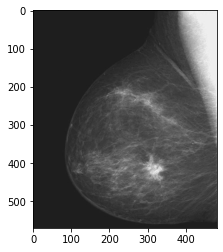

In [ ]:
plt.imshow(img_breast, cmap='gray', vmin=0, vmax=255)

##***Amostragem e Quantização:***

##***Normalização:***

In [ ]:
def normalizacao(img_breast):
    return (img_breast-img_breast.min())/(img_breast.max()-img_breast.min())

img_normalizada = normalizacao(img_breast)

print ("Menor valor de intensidade pré-normalização: {}".format(img_breast.min()))
print ("Maior valor de intensidade pré-normalização: {}".format(img_breast.max()))
print ("Menor valor de intensidade pós-normalização: {}".format(img_normalizada.min()))
print ("Maior valor de intensidade pós-normalização: {}".format(img_normalizada.max()))

Menor valor de intensidade pré-normalização: 21
Maior valor de intensidade pré-normalização: 255
Menor valor de intensidade pós-normalização: 0.0
Maior valor de intensidade pós-normalização: 1.0


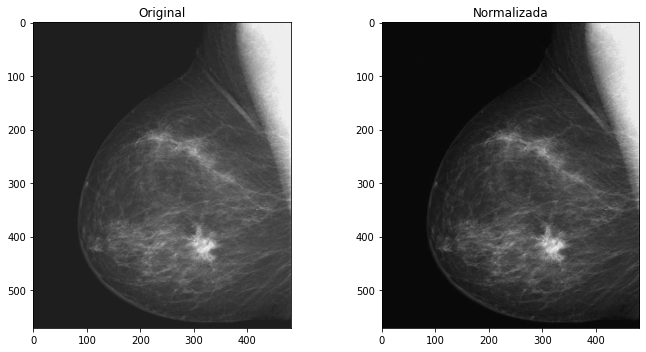

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img_breast, cmap='gray',vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title("Normalizada")
plt.imshow(img_normalizada, cmap='gray', vmin=0, vmax=1)
plt.tight_layout()

##***Conversão dos bits:***

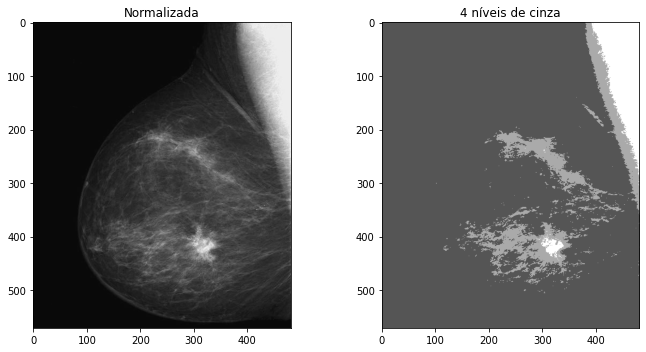

In [ ]:
def conversao_bits(img_breast, n_bits):
    return np.ceil(img_breast*((2**n_bits)-1))

n_bits = 2
n_niveis = 2**n_bits

img_diminuicao_bits = conversao_bits(img_normalizada, n_bits)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Normalizada")
plt.imshow(img_normalizada, cmap='gray',vmin=0, vmax=1)

plt.subplot(1,2,2)
plt.title("{} níveis de cinza".format(n_niveis))
plt.imshow(img_diminuicao_bits, cmap='gray', vmin=0, vmax=n_niveis-1)
plt.tight_layout()

##***Histograma:***

##***Equalização de histograma:***

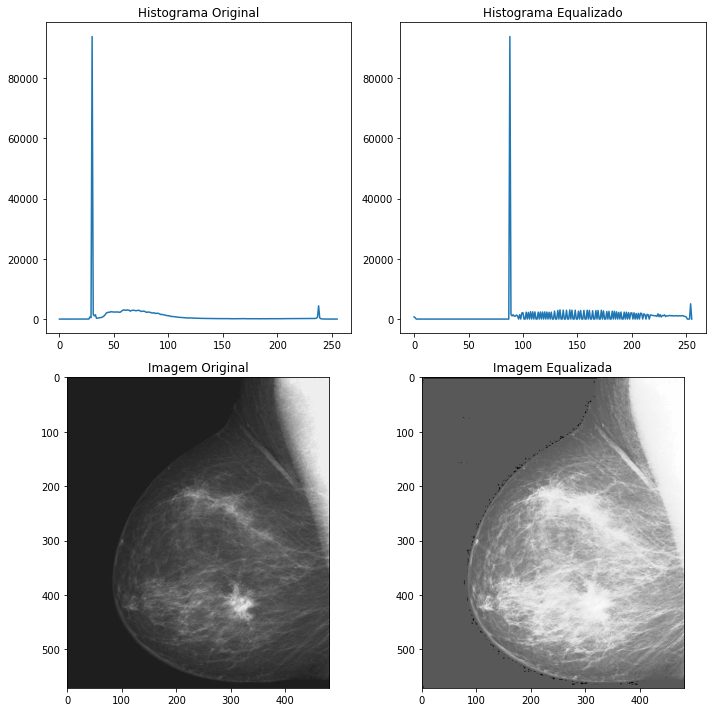

In [ ]:
def histograma(img_breast):
    hist_img = np.zeros(256) # cria um vetor com o número máximo de níveis de cinza
    altura, largura = img_breast.shape # altura é o nº de linhas da matriz, largura é o nº de colunas

    for x in range(0, altura):
        for y in range(0, largura):
            hist_img[img_breast[x,y]] = hist_img[img_breast[x,y]]+1
    return hist_img

def equaliza_hist(img_breast): # funcao de mapeamento dos novos valores de histograma
    hist = histograma(img_breast)
    probabilidade = hist/hist.sum() # probabilidade com que cada nível de cinza aparece na imagem
    cdf = probabilidade.cumsum() # probabilidade de ocorrência de um tom menor que o tom analisado
    return (cdf*255).astype('uint8') # normaliza para os novos tons de cinza baseado na probabilidade

hist_img = histograma(img_breast)
transf_img = equaliza_hist(img_breast)
img_equalizada = transf_img[img_breast]

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("Histograma Original")
plt.plot(hist_img)

plt.subplot(2,2,2)
plt.title("Histograma Equalizado")
plt.plot(histograma(img_equalizada))

plt.subplot(2,2,3)
plt.title("Imagem Original")
plt.imshow(img_breast, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,4)
plt.title("Imagem Equalizada")
plt.imshow(img_equalizada, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()